In [ ]:
## Hyperparmeters
n_epochs = 25   ## number required to training 
learning_rate = 0.001
batch_size=32

In [ ]:
## Libaries
import torch, torchvision
import torchvision.transforms as transforms
import torch.nn as nn
from torch import optim
import matplotlib.pyplot as plt
%matplotlib inline
import copy
import time
from datetime import datetime
time_date = datetime.now()
date = time_date.strftime("%d/%m/%Y")
Time = time_date.strftime("%H:%M:%S")
import numpy as np

In [ ]:
### Some transformations for ALexNet Model
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

In [ ]:
## Downloading training data
train_data = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(train_data, batch_size=4, shuffle=True, num_workers=2)

## Downloading test data
test_data = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(test_data, batch_size=4, shuffle=False, num_workers=2)

## Class labels
classes = ('Airplane', 'Car', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck')

Files already downloaded and verified
Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


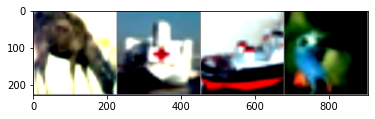

 Deer  Ship  Ship  Bird


In [ ]:
## Some Visualizations --- Function to show some random images
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

## Get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

## Show images
imshow(torchvision.utils.make_grid(images))
## print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [ ]:
## Now using the AlexNet
AlexNet_model = torch.hub.load('pytorch/vision:v0.6.0', 'alexnet', pretrained=False, num_classes=10)
## Model description -- summary
AlexNet_model.eval()

Downloading: "https://github.com/pytorch/vision/archive/v0.6.0.zip" to /root/.cache/torch/hub/v0.6.0.zip


AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [ ]:
## Instantiating CUDA device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

## Verifying CUDA
print(device)

## Move the input and AlexNet_model to GPU for speed if available
AlexNet_model.to(device)

cuda:0


AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [ ]:
## Loss
criterion = nn.CrossEntropyLoss()

## Optimizer using (SGD)
optimizer = optim.SGD(AlexNet_model.parameters(), lr=learning_rate, momentum=0.9)

In [ ]:
## Validation 
def calculate_accuracy(model, data):
    total = 0
    correct = 0
    for i, (images, labels) in enumerate(data):
        images = images.to(device)
        x = model(images)
        value, pred = torch.max(x,1)
        pred = pred.data.cpu()
        total += x.size(0)
        correct += torch.sum(pred == labels)

    return correct*100./total

In [ ]:
## Traing and Validate in one function as MNIST has one channel
def train():
    print("---------------------------------------------------")
    print("Model Training and Testing Start date:", date)
    print("Model Training and Testing starting time:", Time)
    print("---------------------------------------------------")
    print('vgg16 Training and Testing Begins!')
    criterion = nn.CrossEntropyLoss() 
    optimizer = optim.SGD(AlexNet_model.parameters(), lr=learning_rate, momentum=0.9)
    max_accuracy=0
    EPOCH = n_epochs
    train_accuracies = []
    validation_accuracies = []
    
    train_losses = []
    validation_losses = []
    
    for epoch in range(EPOCH):
        ep_start = time.time()
        ## training loop
        train_loss = 0
        for i, (images,labels) in enumerate(trainloader):
            images = images.to(device)
            labels = labels.to(device)
            optimizer.zero_grad()
            outputs = AlexNet_model(images)
            loss = criterion(outputs, labels)
            loss_item = loss.item()
            train_loss += loss_item * images.size(0)
            loss.backward()
            optimizer.step()


        ## validation loop
        valid_loss = 0.0
        AlexNet_model.eval()     # Optional when not using Model Specific layer
        for data, labels in testloader:
            if torch.cuda.is_available():
                data, labels = data.cuda(), labels.cuda()
            
            target = AlexNet_model(data)
            loss = criterion(target,labels)
            valid_loss += loss.item() * data.size(0)

        train_losses.append(train_loss)  
        validation_losses.append(valid_loss)

        valid_accuracy = float(calculate_accuracy(AlexNet_model, testloader))
        train_accuracy = float(calculate_accuracy(AlexNet_model, trainloader))
        
        train_accuracies.append(train_accuracy)
        validation_accuracies.append(valid_accuracy)

        Start_Time=datetime.now()
        
        print(f'Epoch {epoch+1} \t\t Train Acc: {train_accuracy} \t\t Training Loss: {train_loss / len(trainloader)} \t\t Validation Loss: {valid_loss / len(testloader)} \t\t validation Acc: {valid_accuracy} \t\t Time Duration {time.time() - ep_start}:')
        # print("Epoch %d accuracy: %f loss: %f" % (epoch, accuracy, loss_item))
        if valid_accuracy > max_accuracy:
            best_model = copy.deepcopy(criterion)
            max_accuracy = valid_accuracy
            print("Saving Best Model with Accuracy: ", valid_accuracy)
        print('Epoch:', epoch+1, "Accuracy :", valid_accuracy, '%')
    # plt.plot(accuracies)
    history = {'train_losses' : [train_loss / len(trainloader) for train_loss in train_losses], 'train_accuracy' : train_accuracies, 'validation_losses' : [valid_loss / len(testloader) for valid_loss in validation_losses], 'validation_accuracy' : validation_accuracies}
    return best_model, history
    End_Time=datetime.now()
    end_date = End_Time.strftime("%d/%m/%Y")
    end_time = End_Time.strftime("%H:%M:%S")
    print('alexnet Training and Testing Completed!')
    print("--------------------------------------------------")
    print("Model Training and Testing End date:", end_date)
    print("Model Training and Testing End time:", end_time)

In [ ]:
## Call the function to start training
alexnet, history = train()

---------------------------------------------------
Model Training and Testing Start date: 13/05/2022
Model Training and Testing starting time: 13:34:30
---------------------------------------------------
vgg16 Training and Testing Begins!
Epoch 1 		 Train Acc: 54.57400131225586 		 Training Loss: 6.384888155267238 		 Validation Loss: 5.191991272759438 		 validation Acc: 53.34000015258789 		 Time Duration 173.7988781929016:
Saving Best Model with Accuracy:  53.34000015258789
Epoch: 1 Accuracy : 53.34000015258789 %
Epoch 2 		 Train Acc: 71.96199798583984 		 Training Loss: 4.034447085174471 		 Validation Loss: 3.6850277927540245 		 validation Acc: 68.26000213623047 		 Time Duration 170.76445770263672:
Saving Best Model with Accuracy:  68.26000213623047
Epoch: 2 Accuracy : 68.26000213623047 %
Epoch 3 		 Train Acc: 77.4260025024414 		 Training Loss: 2.986770142610818 		 Validation Loss: 3.362628191862069 		 validation Acc: 70.38999938964844 		 Time Duration 171.33775544166565:
Saving Best M

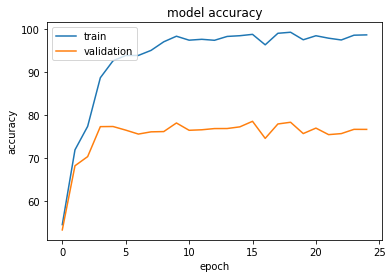

In [ ]:
#  "Accuracy"
plt.plot(history['train_accuracy'])
plt.plot(history['validation_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


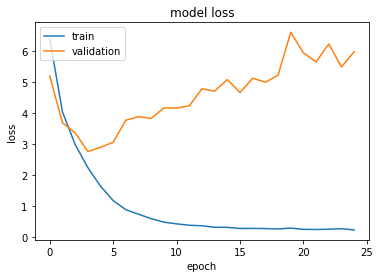

In [ ]:
# "Loss"
plt.plot(history['train_losses'])
plt.plot(history['validation_losses'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
## Testing classification accuracy for individual classes. -- also it is useful if you want it
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = AlexNet_model(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(batch_size):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

IndexError: index 4 is out of bounds for dimension 0 with size 4